## How can we group the good grains.. Which wheat is good to buy...
Wheat can be classified in three ways:

**Colour** (e.g., red, yellow, white)

**Planting season:** 
                     - spring wheat, planted in the spring and harvested in early fall
                     - winter wheat, planted in the fall, harvested the following summer

**Characteristics of the grain:** durum, hard bread wheat, and soft wheat

In Canada, hard spring wheat suitable for yeast products is grown on the Prairies. In southern Alberta, where winters are not as severe, some hard winter wheat is grown. Irrigated land in Alberta also produces some white soft winter wheat. The main soft white winter wheat growing area is southern Ontario.

Now let us see thE data of the wheat, try to have the groups of wheat which are similar to each other based on multiple features.

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment.

High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology.

The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

How we can help identify the similar wheat..

## Attribute Information:
To construct the data, seven geometric parameters of wheat kernels were measured:

1. area A,
2. perimeter P,
3. compactness C = 4piA/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove. All of these parameters were real-valued continuous.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('seeds.csv')

In [3]:
#Dimension of a dataframe
df.shape

(210, 8)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama wheat
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,Kama wheat
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,Kama wheat
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,Kama wheat


In [5]:
#Data type of all columns
df.dtypes

area                     float64
perimeter                float64
compactness              float64
length                   float64
width                    float64
asymmetry_coefficient    float64
groove_length            float64
grain_variety             object
dtype: object

In [6]:
#Checking for a missing values
df.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
grain_variety            0
dtype: int64

In [7]:
#Forget about the grain variety for the moment - we'll use this later
varieties = df['grain_variety']
del df['grain_variety']

Display the DataFrame to inspect the data. Notice that there are 7 columns so each grain sample (row) is a point in 7D space! Scatter plots can't help us here.

In [8]:
#First 10 rows of a dataframe
df.head(10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533


In [9]:
#Extract the measurements from the DataFrame using its .values attribute
sample = df.values

In [10]:
sample

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

Measure the quality of clusterings with different numbers of clusters using the inertia. For each of the given values of k, perform the following steps:

Create a KMeans instance called model with k clusters.

Fit the model to the grain data samples.

Append the value of the inertia_ attribute of model to the list inertias.

In [11]:
#Implement K-Means
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sample)
    inertia.append(kmeans.inertia_)

Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

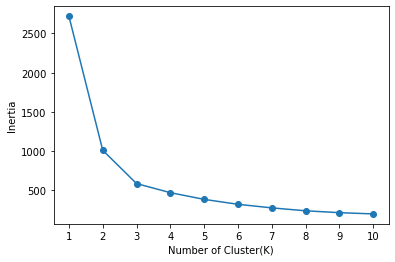

In [12]:
#Plot number of cluster(k) vs inertia
plt.plot(range(1, 11), inertia, '-o')
plt.xlabel('Number of Cluster(K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

You can see from the graph that 3 is a good number of clusters, since these are points where the elbow begins

Now let us do the Kmeans with 3 clusters

In [13]:
#Implement K-Means with K=3
kmeans = KMeans(n_clusters=3)

In [14]:
#Derive the cluster labels
labels = kmeans.fit_predict(sample)

In [15]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

Count the number of times each grain variety coincides with each cluster label.

In [16]:
#Create a dataframe in order to store grain variety and its labels
df = pd.DataFrame({'labels' : labels, 'varieties' : varieties})

In [17]:
df

,labels,varieties
0,0,Kama wheat
1,0,Kama wheat
2,0,Kama wheat
3,0,Kama wheat
4,0,Kama wheat
...,...,...
205,2,Canadian wheat
206,2,Canadian wheat
207,2,Canadian wheat
208,2,Canadian wheat


In [18]:
#Create a two way table in order to view labels and its variety
pd.crosstab(df['labels'], df['varieties'])

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0
